### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [75]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [2]:
loan = pd.read_csv("Loan_Modelling.csv")

In [3]:
data = loan.copy()

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
data.shape

(5000, 14)

* Dataset has 5000 rows and 14 columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are no null values in the data 
* All but 1 of the data-types are int64
* Column CCAvg is of data type float64.

In [8]:
# fixing the names of columns as there are spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]

In [9]:
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* most numerical variables seem to be right-skewed.

In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the data

In [12]:
data[data.drop(columns = 'ID').duplicated(keep=False)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


* There are more duplicated rows in the data 

In [13]:
data[data.drop(columns = 'Personal_Loan').duplicated(keep=False)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


* There are no duplicated rows in the independent variable of the data 

In [14]:
data[data["Mortgage"] == 0].sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0
3491,3492,51,27,12,92697,2,0.4,1,0,0,0,0,0,1
2080,2081,65,40,69,91706,4,0.1,2,0,0,0,0,1,0
4072,4073,42,17,78,92521,1,1.0,3,0,0,0,0,1,0
672,673,51,27,23,96651,1,0.2,1,0,0,0,0,1,0
4761,4762,61,35,74,91320,2,0.7,2,0,0,0,0,1,1
2545,2546,25,-1,39,94720,3,2.4,2,0,0,0,0,1,0
4317,4318,58,33,60,92672,4,1.3,3,0,0,0,0,1,0
4588,4589,35,10,85,95351,4,2.1,3,0,0,0,0,0,1
2492,2493,28,3,134,96091,2,3.1,1,0,0,0,0,1,0


* There is no pattern in the rows for Mortgage being 0. This could be cases where users have not taken a loan so can be valid data . Will include the data in analysis.

In [15]:
data[data["Mortgage"] == 0]["Income"].value_counts()

39     63
41     62
83     58
44     57
81     56
38     56
40     55
42     52
84     51
43     50
80     48
21     47
25     46
85     45
78     45
22     45
29     44
65     44
45     43
64     42
30     41
82     41
35     41
61     40
23     40
53     40
18     40
31     39
28     39
74     38
32     37
55     37
58     37
63     37
75     36
49     35
34     35
50     35
70     35
62     35
60     35
24     35
69     34
59     34
33     34
52     34
79     33
48     32
54     31
20     31
51     30
73     30
19     30
90     30
114    27
91     26
93     26
68     24
71     24
72     24
113    23
13     23
89     22
141    21
12     21
125    20
115    20
128    19
88     19
129    19
92     18
14     18
15     18
95     18
9      18
155    17
122    17
11     16
10     16
8      16
111    16
104    16
149    16
138    16
112    16
101    16
121    15
131    15
105    15
154    15
98     15
94     14
134    14
123    14
99     13
110    13
109    13
152    13
158    12
103    12


* There is no pattern between users income and not taking a mortgage

In [16]:
data["ZIPCode"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
96145      1
90068      1
92694      1
94404      1
Name: ZIPCode, Length: 467, dtype: int64

* Converting zipcode to county

In [17]:
import uszipcode
from uszipcode import SearchEngine
search = SearchEngine()

In [18]:
data1 = data.copy()

In [19]:
county= []
for i in np.arange(0, len(data['ZIPCode'])):
    zipcode = search.by_zipcode(data['ZIPCode'][i])
    county.append(zipcode.county)

In [20]:
data1['County'] = county
data1.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [21]:
data1.County.unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', None,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

In [22]:
data1.County.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

In [23]:
data1.County = data1.County.str.replace(" County", "") 

In [24]:
data1.County = data1.County.str.replace(" ", "-") 

In [25]:
data1.County.head()

0      Los-Angeles
1      Los-Angeles
2          Alameda
3    San-Francisco
4      Los-Angeles
Name: County, dtype: object

In [26]:
data1[data1["County"] == "None"].value_counts()

Series([], dtype: int64)

* There are no missing values in the new column County

In [27]:
data[data["Experience"] < 0].sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1173,1174,24,-1,35,94305,2,1.70,2,0,0,0,0,0,0
2102,2103,25,-1,81,92647,2,1.60,3,0,0,0,0,1,1
4582,4583,25,-1,69,92691,3,0.30,3,0,0,0,0,1,0
909,910,23,-1,149,91709,1,6.33,1,305,0,0,0,0,1
4957,4958,29,-1,50,95842,2,1.75,3,0,0,0,0,0,1


* There are values for column Experience that are negative. This could be a data entry error. converting values to absolute

In [28]:
data2 = data1.copy()

In [29]:
data2['Experience'] = data2['Experience'].abs()

In [30]:
data3 = data2.copy()

In [31]:
data3.drop("ZIPCode", axis=1, inplace=True)

## Univariate Analysis

In [32]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

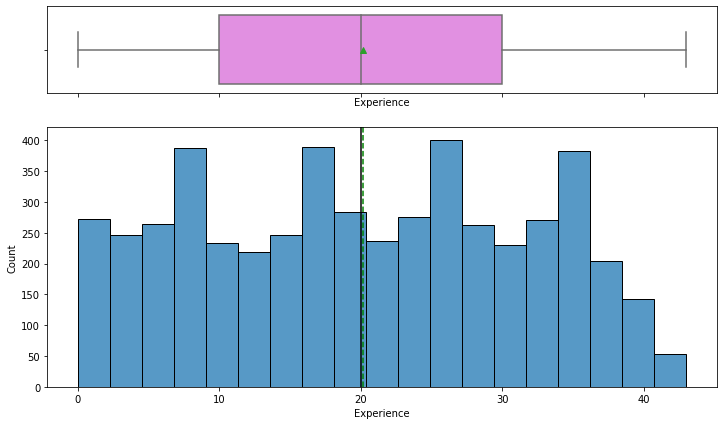

In [33]:
histogram_boxplot(data3, "Experience")

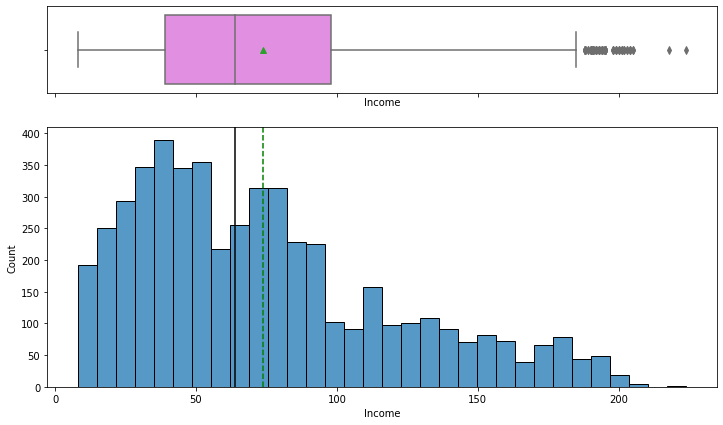

In [34]:
histogram_boxplot(data3, "Income")

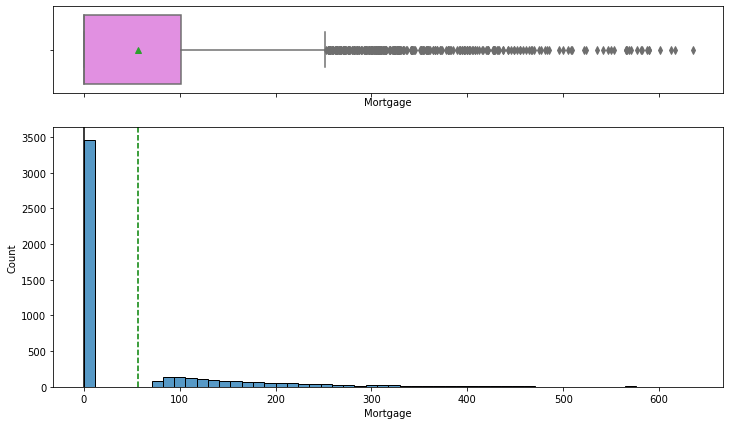

In [35]:
histogram_boxplot(data3, "Mortgage")

* The distribution for Income is right skewed
* There are outliers in Mortgage

In [36]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

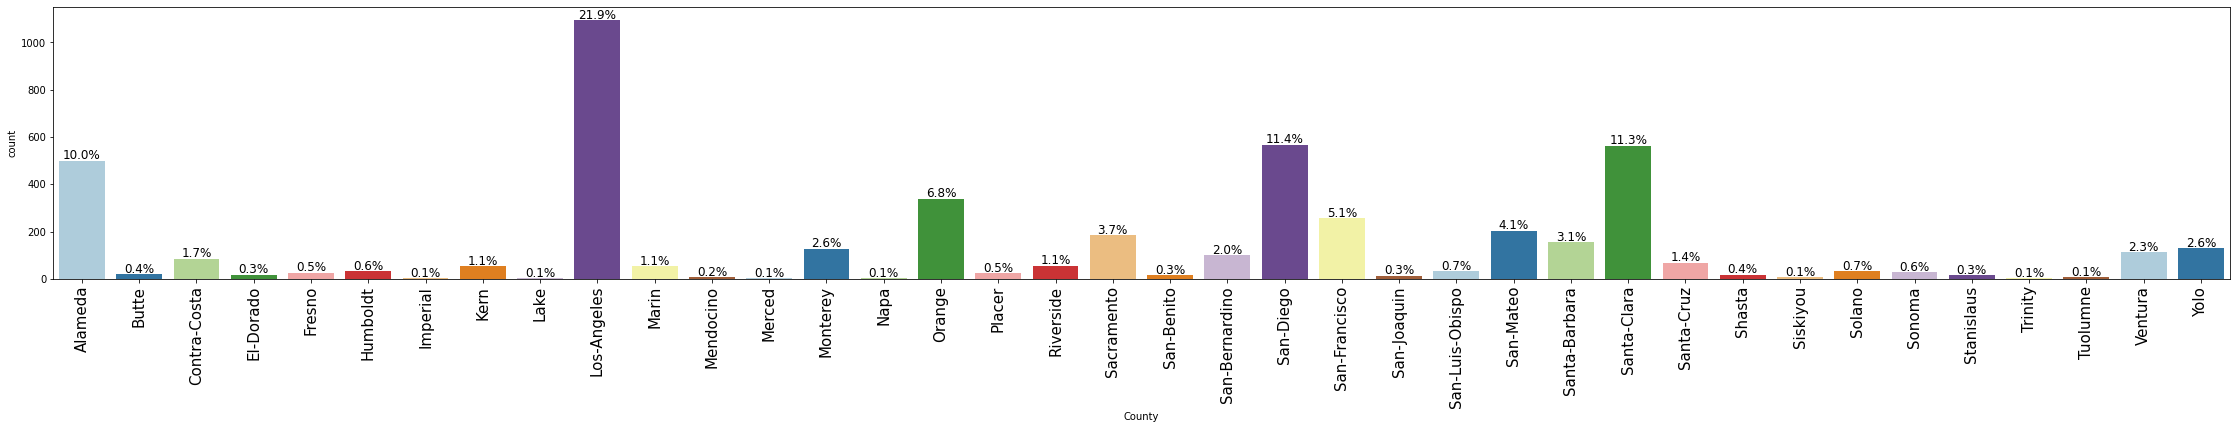

In [37]:
labeled_barplot(data3, "County", perc=True)

* Los Angeles has the most no . of clients

## Bivariate Analysis

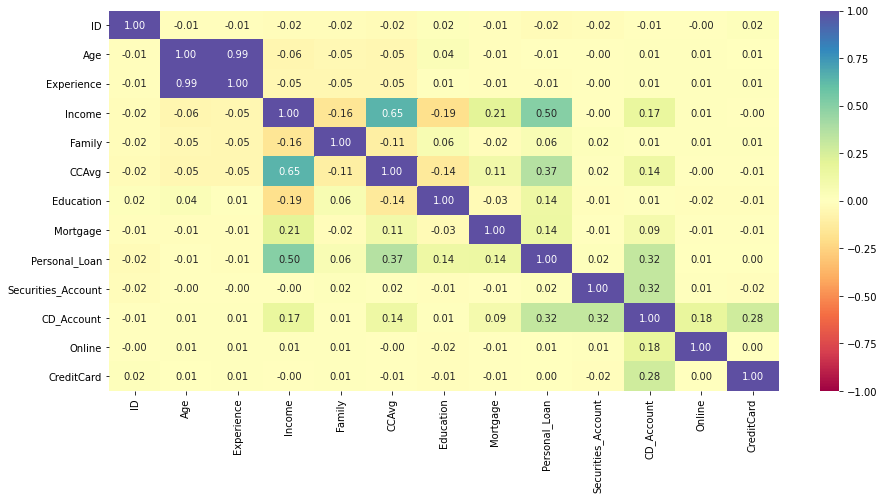

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(data3.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Insights on EDA
* There are no strong correlations between the variable 
* There is a correlation between CCAvg and Income 
* Los Angeles has the most no . of clients

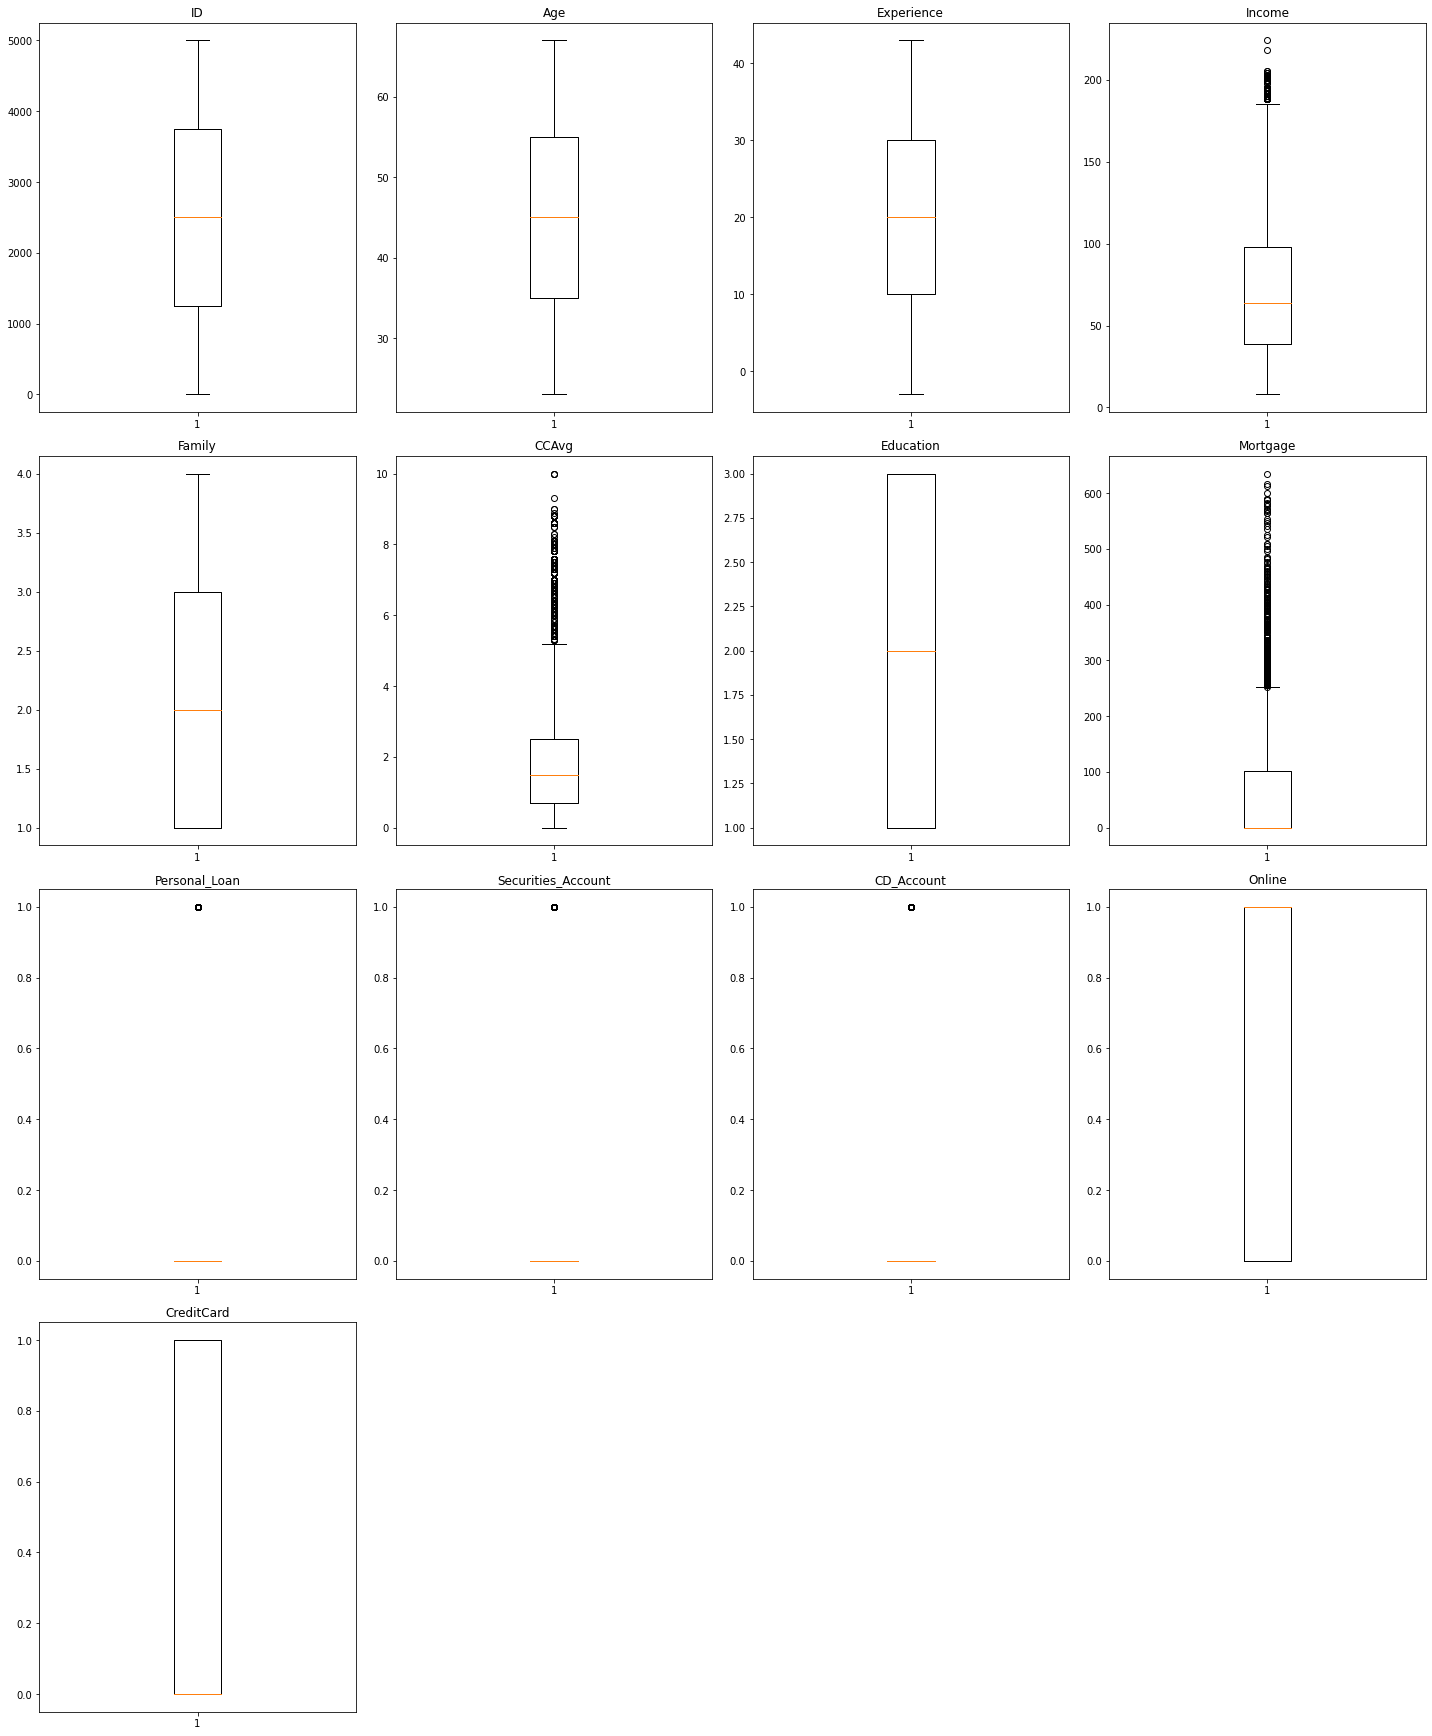

In [39]:
numerical_col = data3.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Mortgage , Income and CCAvg have many outliers . Lets treat them

### Treating Outliers

In [40]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [41]:
out_col = ["Income","CCAvg","Mortgage"]
data3 = treat_outliers_all(data3, out_col
                          )

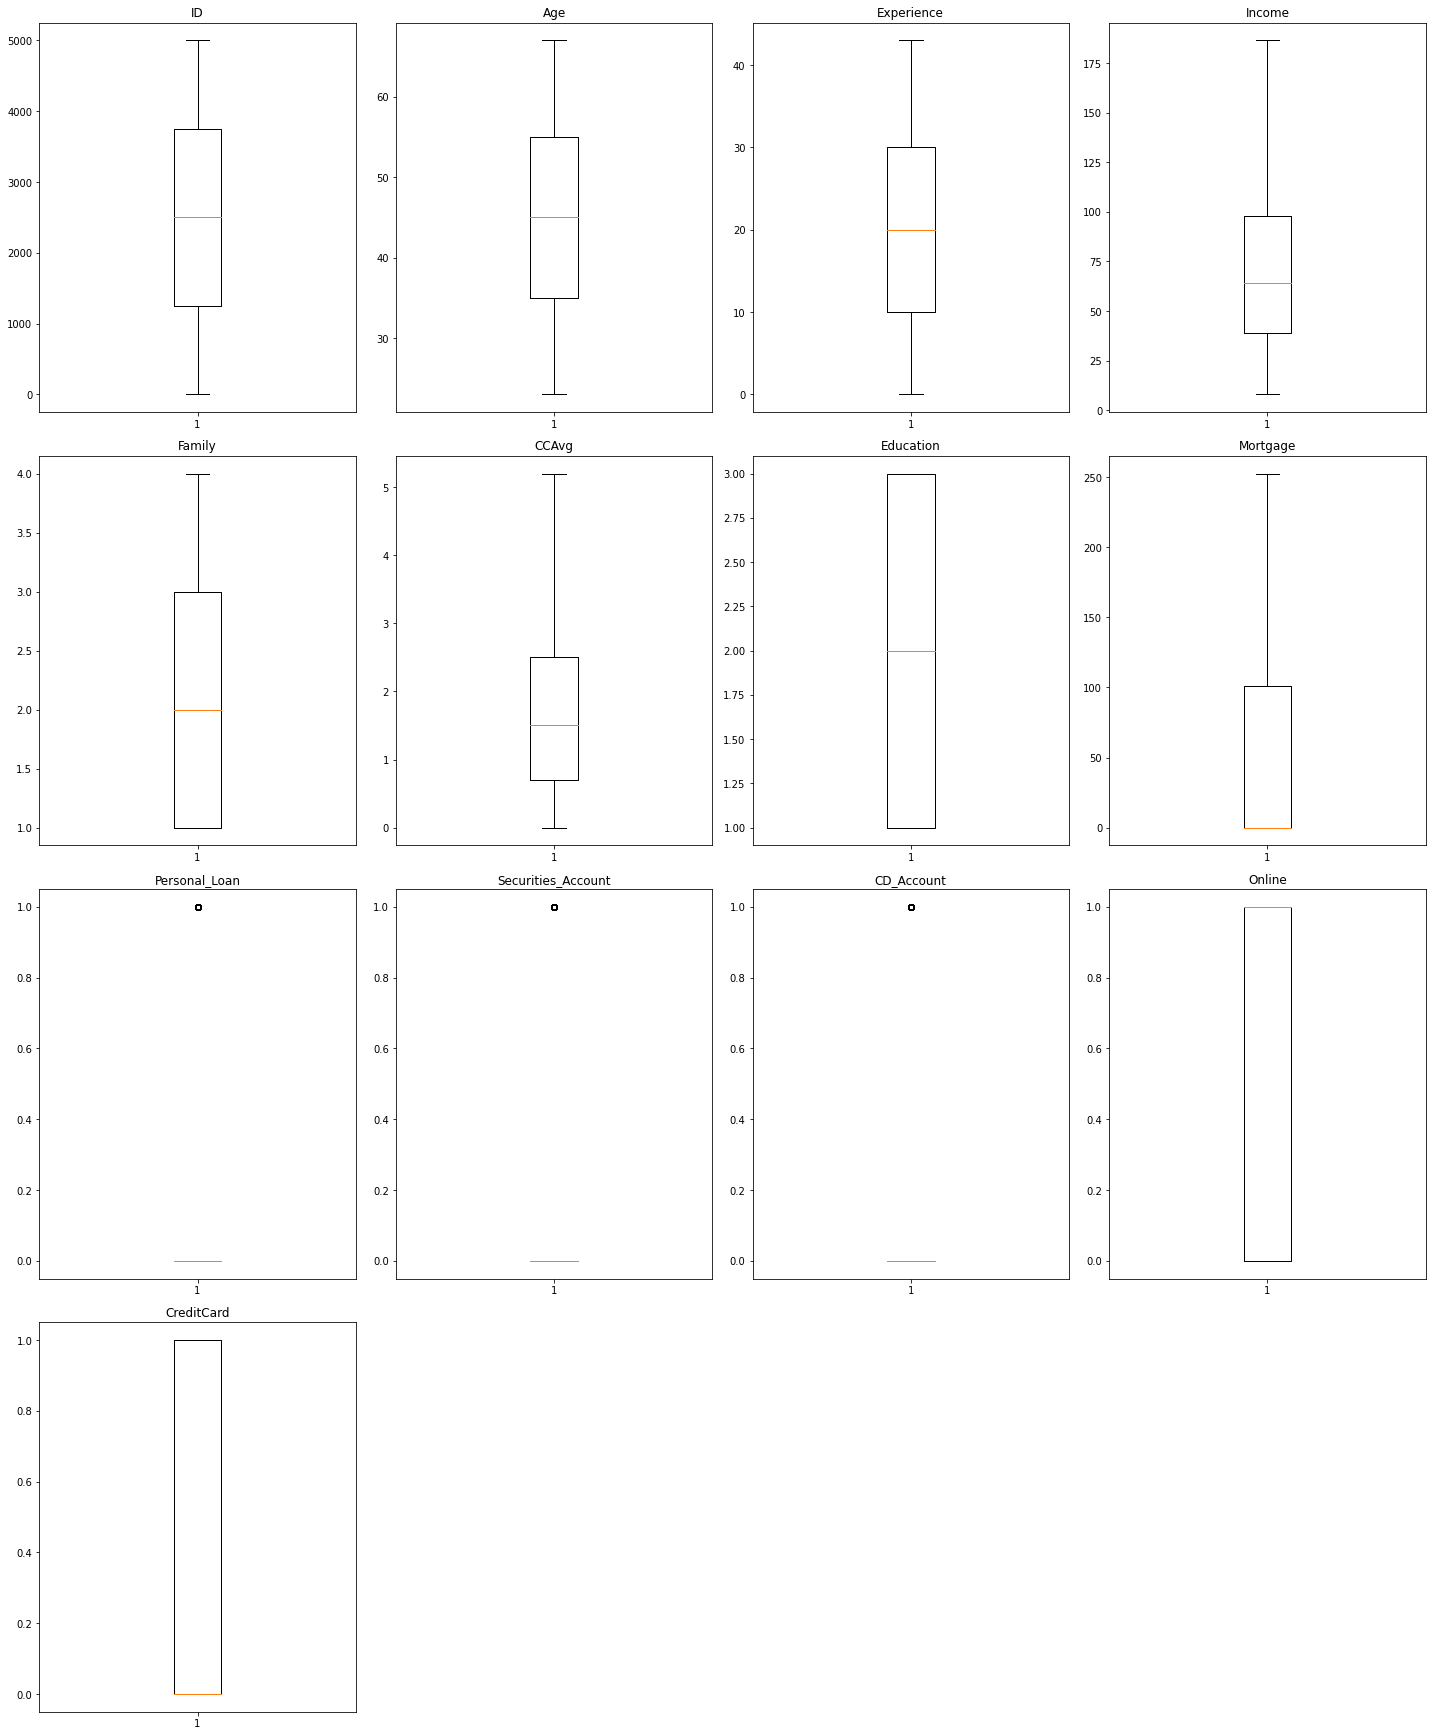

In [42]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data3[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [43]:
data3.drop("ID", axis=1, inplace=True)

### Split Data

In [44]:
data3["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

* There are 4520 customers who didnt take a loan while 480 customers who did . a 90 /10 ratio 

In [45]:
X = data3.drop("Personal_Loan" , axis=1)
y = data3.pop("Personal_Loan")
X = pd.get_dummies(X, drop_first=True)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.10, random_state=1)

In [47]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 48)
Shape of test set :  (1500, 48)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


* The ratio of training data to test data is 90/10 which is similar to the target variable 

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [49]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [50]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [51]:
model.predict_proba(X_test)

array([[9.71784072e-01, 2.82159280e-02],
       [9.99779333e-01, 2.20667216e-04],
       [9.99630550e-01, 3.69449957e-04],
       ...,
       [9.97675992e-01, 2.32400823e-03],
       [9.97594944e-01, 2.40505637e-03],
       [9.99436893e-01, 5.63106548e-04]])

In [52]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,County_Butte,County_Contra-Costa,County_El-Dorado,County_Fresno,County_Humboldt,County_Imperial,County_Kern,County_Lake,County_Los-Angeles,County_Marin,County_Mendocino,County_Merced,County_Monterey,County_Napa,County_Orange,County_Placer,County_Riverside,County_Sacramento,County_San-Benito,County_San-Bernardino,County_San-Diego,County_San-Francisco,County_San-Joaquin,County_San-Luis-Obispo,County_San-Mateo,County_Santa-Barbara,County_Santa-Clara,County_Santa-Cruz,County_Shasta,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Trinity,County_Tuolumne,County_Ventura,County_Yolo,Intercept
Coefficients,-0.019903,0.028342,0.055144,0.773929,0.396824,1.756971,0.001167,-0.831704,3.216378,-0.580903,-0.984422,-0.244203,0.678483,-0.143469,-0.008817,-0.316676,-0.013975,0.556031,-0.004234,0.025096,0.431748,-0.038755,-0.20321,-0.045136,-0.004814,-0.1996,0.686079,0.986582,0.099044,-0.226016,-0.80018,0.054709,0.307067,0.013585,-0.43324,-1.023248,0.129487,0.199572,0.148755,-0.171955,-0.022257,0.230949,0.480813,-0.258629,-0.093202,-0.139284,0.17595,-0.454462,-14.205735


* Coefficients of Age , Securities_Account, Online ,Credit card are negative

In [53]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,County_Butte,County_Contra-Costa,County_El-Dorado,County_Fresno,County_Humboldt,County_Imperial,County_Kern,County_Lake,County_Los-Angeles,County_Marin,County_Mendocino,County_Merced,County_Monterey,County_Napa,County_Orange,County_Placer,County_Riverside,County_Sacramento,County_San-Benito,County_San-Bernardino,County_San-Diego,County_San-Francisco,County_San-Joaquin,County_San-Luis-Obispo,County_San-Mateo,County_Santa-Barbara,County_Santa-Clara,County_Santa-Cruz,County_Shasta,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Trinity,County_Tuolumne,County_Ventura,County_Yolo
Odds,0.980294,1.028747,1.056693,2.168269,1.487094,5.794856,1.001168,0.435307,24.937643,0.559393,0.373655,0.783329,1.970885,0.866348,0.991221,0.728567,0.986122,1.743738,0.995775,1.025414,1.539947,0.961986,0.816106,0.955868,0.995197,0.819058,1.985914,2.682052,1.104115,0.797705,0.449248,1.056233,1.359433,1.013677,0.648405,0.359426,1.138245,1.22088,1.160389,0.842017,0.977989,1.259795,1.617389,0.772109,0.911009,0.869981,1.192379,0.634789
Change_odd%,-1.970613,2.874704,5.669252,116.826894,48.709448,479.485550,0.116768,-56.469319,2393.764290,-44.060682,-62.634501,-21.667127,97.088544,-13.365197,-0.877858,-27.143312,-1.387825,74.373756,-0.422486,2.541376,53.994735,-3.801406,-18.389356,-4.413245,-0.480265,-18.094180,98.591426,168.205201,10.411510,-20.229476,-55.075181,5.623316,35.943266,1.367729,-35.159546,-64.057428,13.824482,22.08800,16.038888,-15.798299,-2.201100,25.979533,61.738896,-22.789091,-8.899073,-13.001896,19.237854,-36.521071


#### Checking model performance on training set

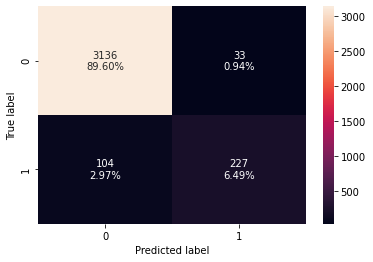

In [54]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [55]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.960857,0.685801,0.873077,0.76819


#### Checking performance on test set

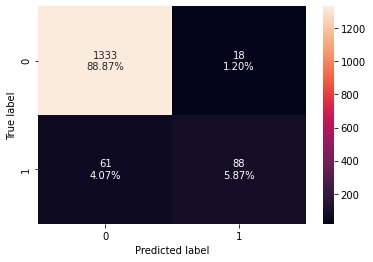

In [56]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [57]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.947333,0.590604,0.830189,0.690196


#### ROC-AUC

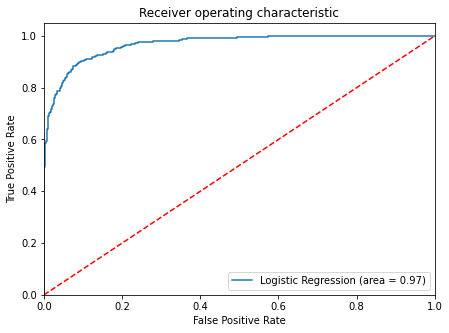

In [58]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

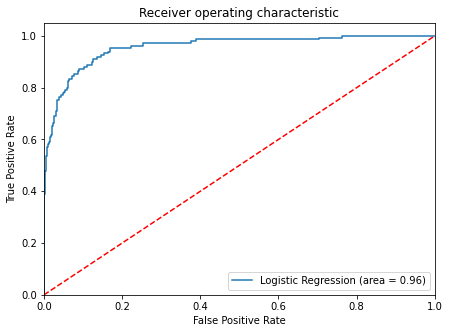

In [59]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

###  sequential feature selector

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [61]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

In [63]:
sfs = SFS(
    model,
    k_features=48,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.2s finished

[2021-08-03 12:45:13] Features: 1/48 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.3s finished

[2021-08-03 12:45:14] Features: 2/48 -- score: 0.6437527159212849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.3s finished

[2021-08-03 12:45:16] Features: 3/48 -- score: 0.6920154589897836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  45 

[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.5s finished

[2021-08-03 12:46:01] Features: 28/48 -- score: 0.7534896191767778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.5s finished

[2021-08-03 12:46:02] Features: 29/48 -- score: 0.7534896191767778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.6s finished

[2021-08-03 12:46:04] Features: 30/48 -- score: 0.7534896191767778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5

* Based on the F1 score after 13 the score levels out, so we can calculate the 13 most relevant columns  

In [64]:
sfs1 = SFS(
    model,
    k_features=13,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished

[2021-08-03 12:46:37] Features: 1/13 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.3s finished

[2021-08-03 12:46:39] Features: 2/13 -- score: 0.6437527159212849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.3s finished

[2021-08-03 12:46:40] Features: 3/13 -- score: 0.6920154589897836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  45 

In [65]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 25, 35]


In [66]:
X_train.columns[feat_cols]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'County_Contra-Costa', 'County_Orange', 'County_San-Mateo'],
      dtype='object')


## Summary 

### The most relevant columns are Age, Income, Family, CCAvg, Education, Mortgage, Securtities_Account, CD_Account, Online , Credit Card 
### The zipcode(Counties) do not make much of a difference to the prediction

### Create a Classification model

### Build Decision Tree Model

In [69]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

### Scoring our Decision Tree

In [70]:
print("Accuracy on training set : ",dTree.score(X_train,y_train))
print("Accuracy on test set :",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set : 0.98


* Accuracy of train and test data are similar so there is not a lot of over fitting

In [71]:
y.sum(axis = 0)

480

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will purchase a loan in reality the customer will not purchase a loan. - Loss of resources

2. Predicting a customer will not purchase a loan in reality the customer will  purchase a loan. - Loss of opportunity

### Which case is more important? 

* Predicting a customer will not purchase a loan in reality the customer will  purchase a loan.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [77]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

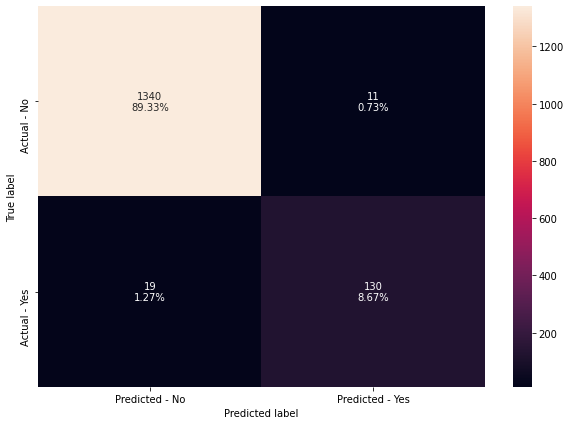

In [79]:
make_confusion_matrix(dTree,y_test)

In [80]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.87248322147651


In [81]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte', 'County_Contra-Costa', 'County_El-Dorado', 'County_Fresno', 'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake', 'County_Los-Angeles', 'County_Marin', 'County_Mendocino', 'County_Merced', 'County_Monterey', 'County_Napa', 'County_Orange', 'County_Placer', 'County_Riverside', 'County_Sacramento', 'County_San-Benito', 'County_San-Bernardino', 'County_San-Diego', 'County_San-Francisco', 'County_San-Joaquin', 'County_San-Luis-Obispo', 'County_San-Mateo', 'County_Santa-Barbara', 'County_Santa-Clara', 'County_Santa-Cruz', 'County_Shasta', 'County_Siskiyou', 'County_Solano', 'County_Sonoma', 'County_Stanislaus', 'County_Trinity', 'County_Tuolumne', 'County_Ventura', 'County_Yolo']


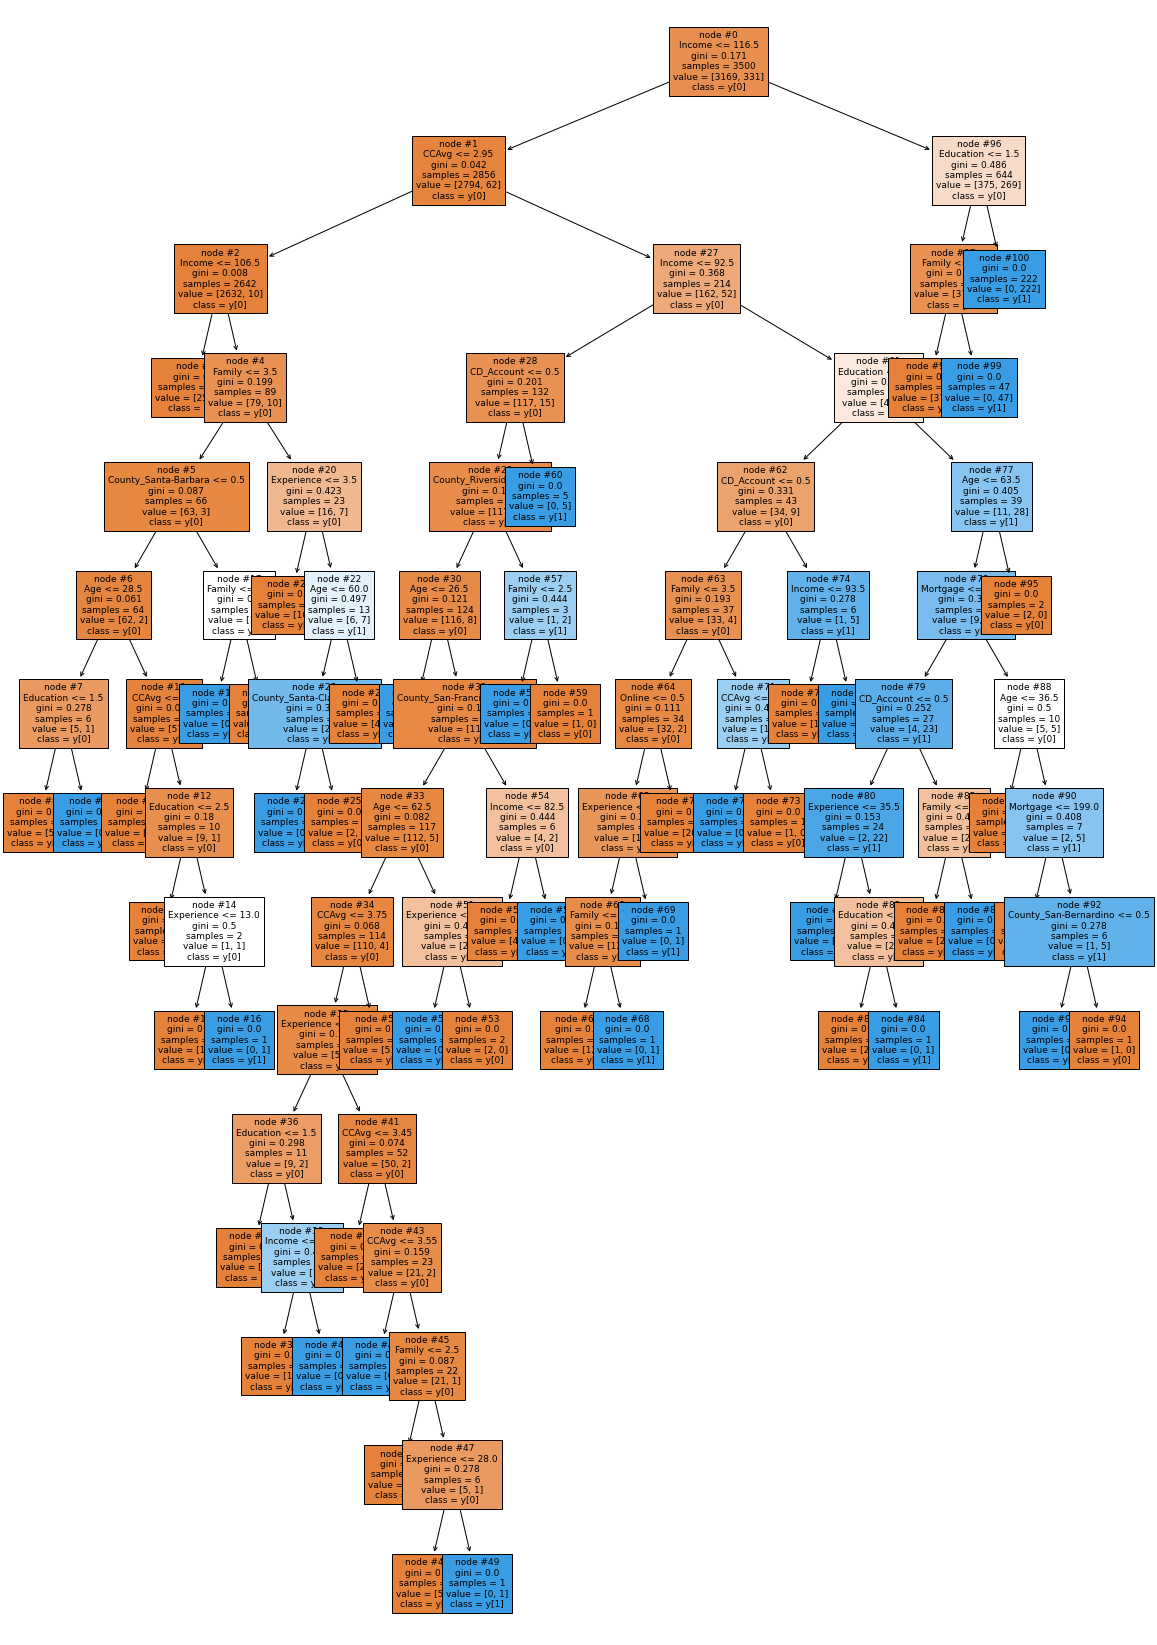

In [82]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [83]:
# importance of features in the tree
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Education               0.410527
Income                  0.307270
Family                  0.156174
CCAvg                   0.043908
CD_Account              0.025711
Experience              0.019297
Age                     0.017007
County_Santa-Clara      0.005190
Mortgage                0.005001
County_Riverside        0.003544
County_San-Bernardino   0.002781
County_San-Francisco    0.001608
County_Santa-Barbara    0.001422
Online                  0.000561
County_San-Mateo        0.000000
County_San-Diego        0.000000
County_Ventura          0.000000
County_San-Joaquin      0.000000
County_San-Luis-Obispo  0.000000
County_Tuolumne         0.000000
County_Trinity          0.000000
County_Santa-Cruz       0.000000
County_Shasta           0.000000
County_Siskiyou         0.000000
County_San-Benito       0.000000
County_Sonoma           0.000000
County_Stanislaus       0.000000
County_Solano           0.000000
County_Napa             0.000000
County_Sac

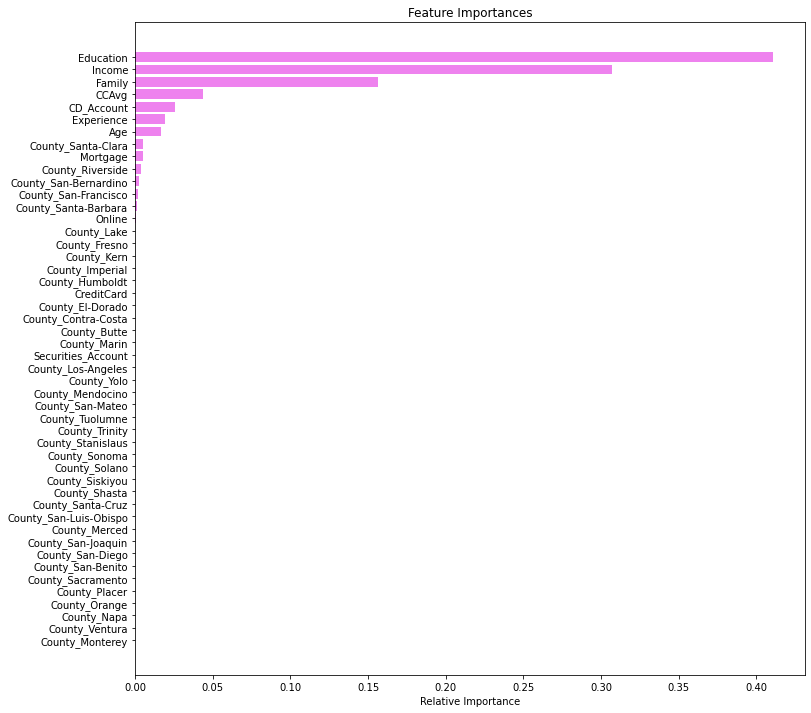

In [84]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**The tree above is relatively complex, there could be a chance of overfitting although we are getting a good testing recall value. Lets see if pruning helps improve the model**

## Reducing over fitting

In [85]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 3

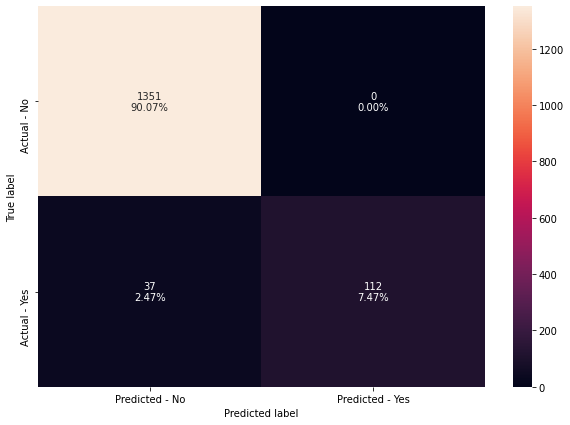

In [86]:
make_confusion_matrix(dTree1, y_test)

In [87]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


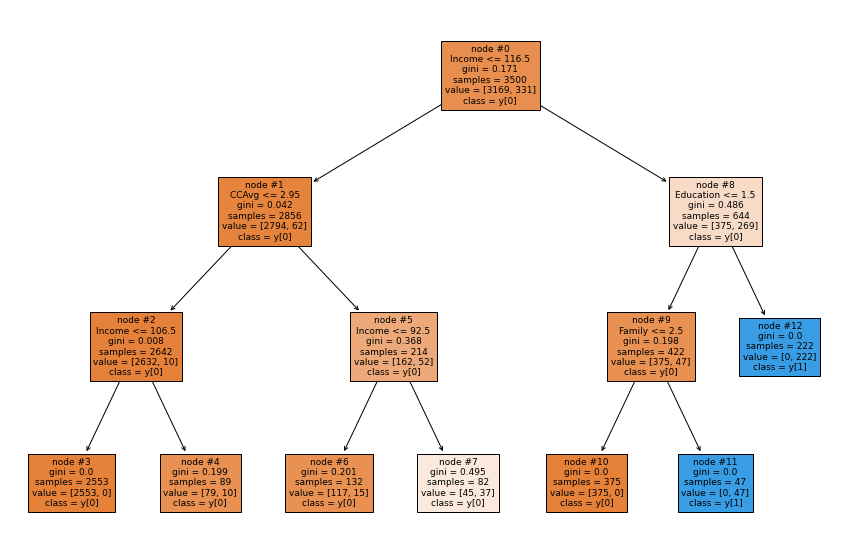

In [88]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [89]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Education               0.446593
Income                  0.346997
Family                  0.162372
CCAvg                   0.044038
Age                     0.000000
County_Santa-Clara      0.000000
County_Sacramento       0.000000
County_San-Benito       0.000000
County_San-Bernardino   0.000000
County_San-Diego        0.000000
County_San-Francisco    0.000000
County_San-Joaquin      0.000000
County_San-Luis-Obispo  0.000000
County_San-Mateo        0.000000
County_Santa-Barbara    0.000000
County_Shasta           0.000000
County_Santa-Cruz       0.000000
County_Placer           0.000000
County_Siskiyou         0.000000
County_Solano           0.000000
County_Sonoma           0.000000
County_Stanislaus       0.000000
County_Trinity          0.000000
County_Tuolumne         0.000000
County_Ventura          0.000000
County_Riverside        0.000000
County_Napa             0.000000
County_Orange           0.000000
County_Fresno           0.000000
Mortgage  

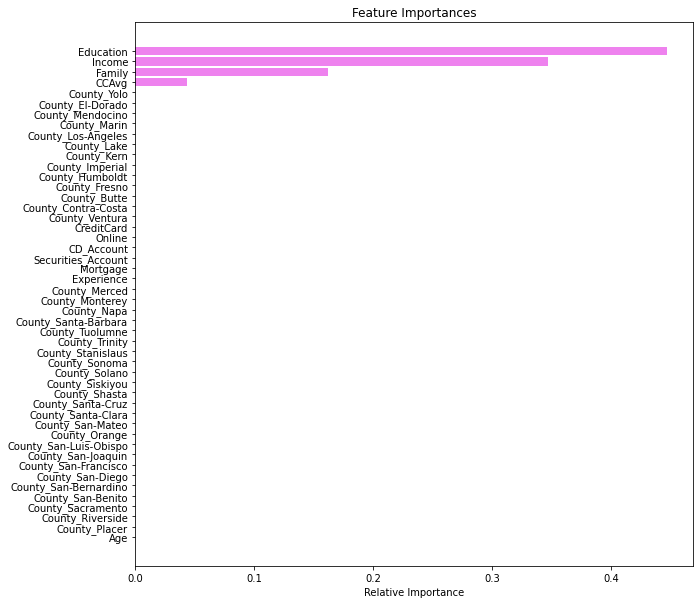

In [90]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

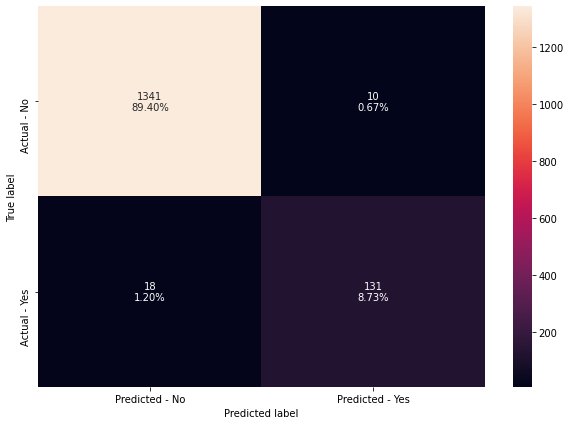

In [93]:
make_confusion_matrix(estimator,y_test)

In [94]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


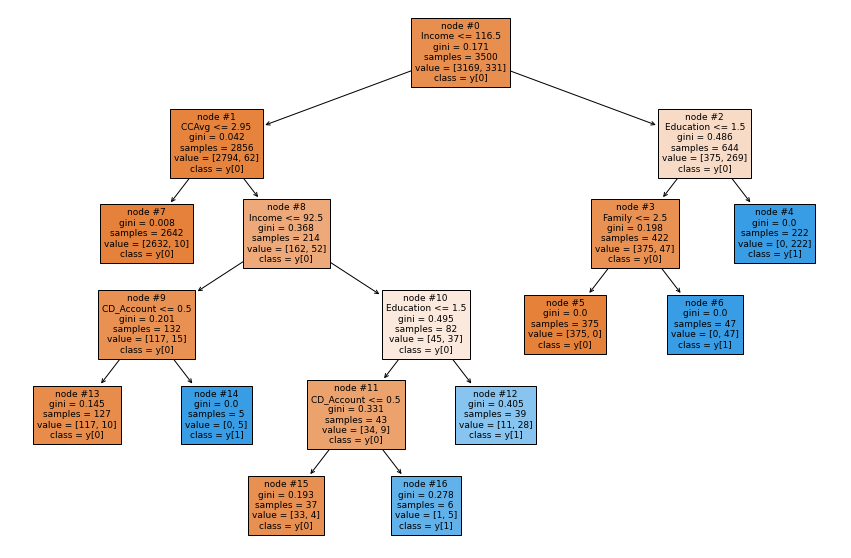

In [96]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

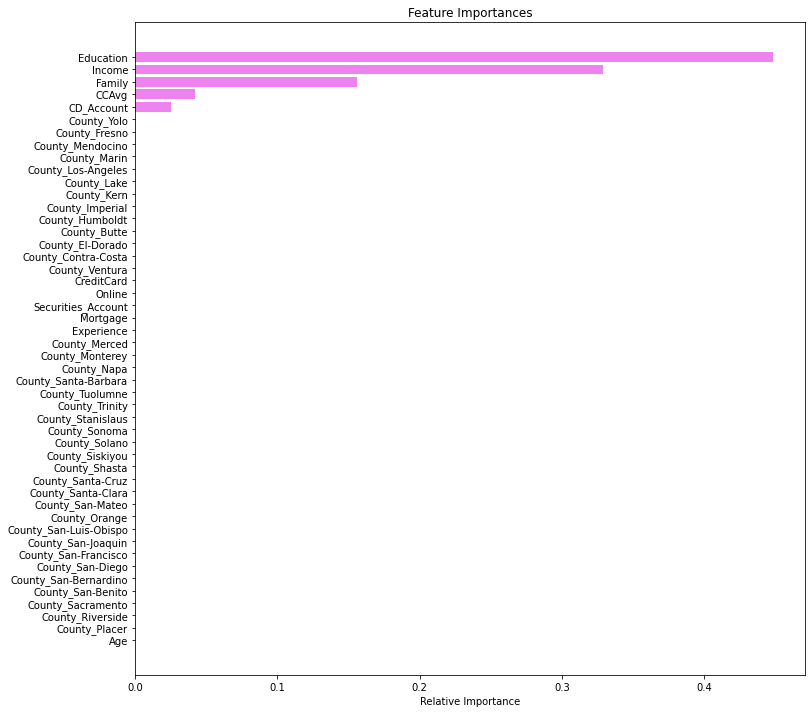

In [97]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [98]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [99]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000269,0.001636
3,0.000273,0.002182
4,0.000274,0.004371
5,0.000359,0.005447
6,0.000381,0.005828
7,0.000381,0.006209
8,0.000381,0.006590
9,0.000381,0.006971


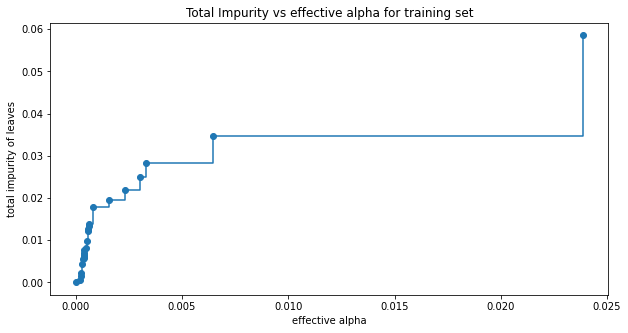

In [100]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [101]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


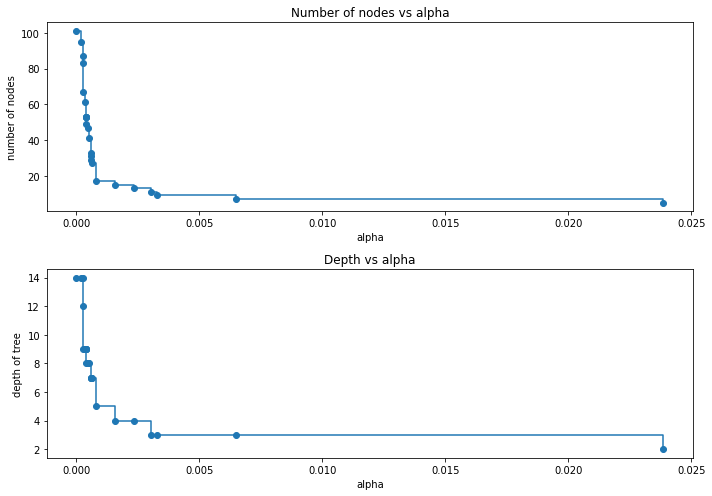

In [102]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets

In [103]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

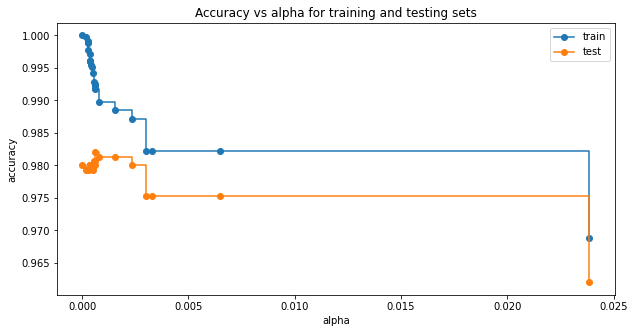

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [105]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)
Training accuracy of best model:  0.9917142857142857
Test accuracy of best model:  0.982


In [106]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [107]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

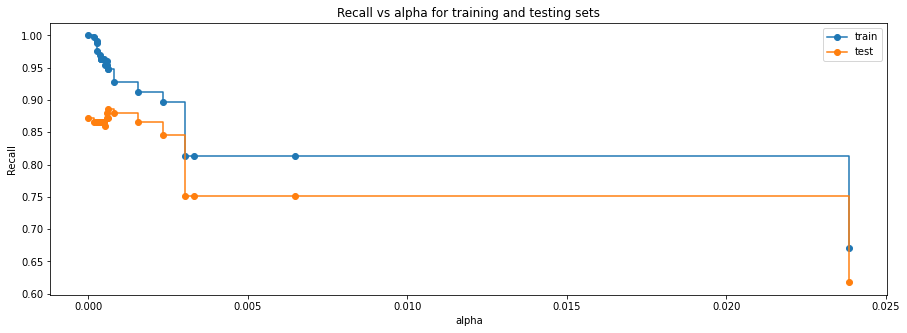

In [108]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


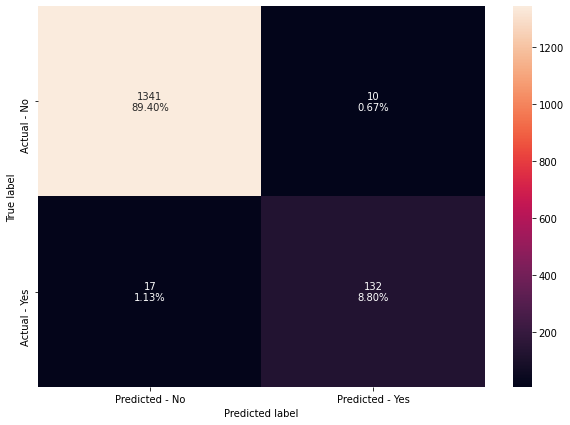

In [110]:
make_confusion_matrix(best_model,y_test)

In [111]:
get_recall_score(best_model)

Recall on training set :  0.9486404833836858
Recall on test set :  0.8859060402684564


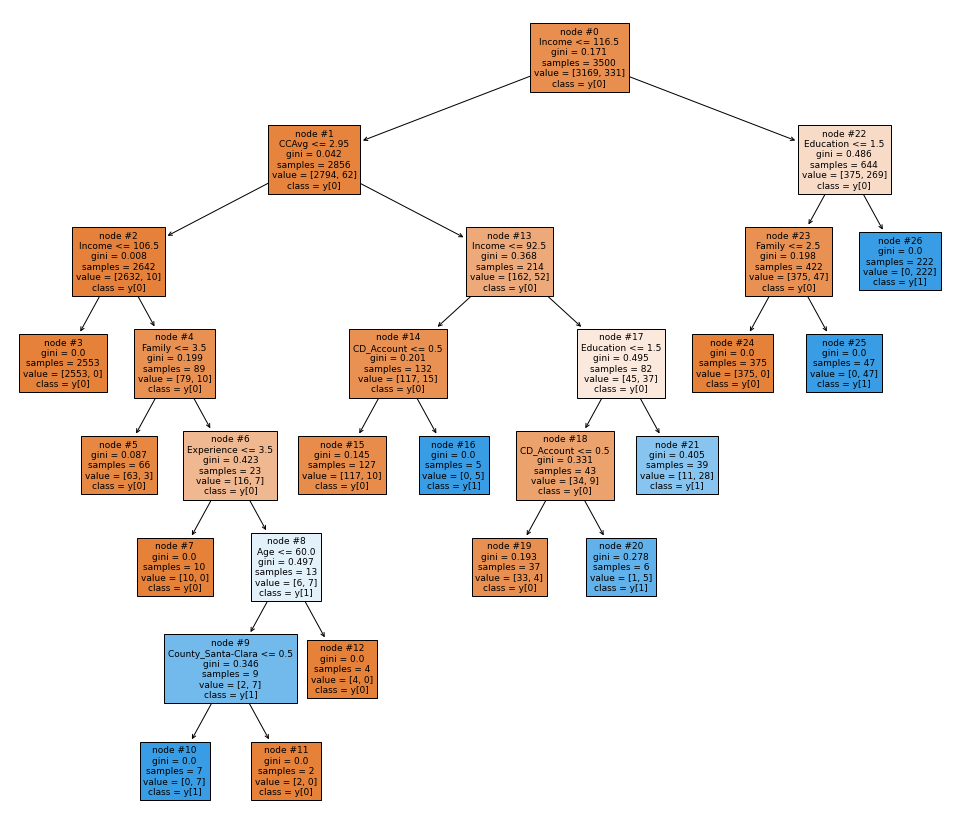

In [112]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [113]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Education               0.436448
Income                  0.324182
Family                  0.155849
CCAvg                   0.041142
CD_Account              0.024692
Age                     0.006085
Experience              0.005952
County_Santa-Clara      0.005650
County_San-Benito       0.000000
County_San-Bernardino   0.000000
County_San-Diego        0.000000
County_San-Francisco    0.000000
County_San-Joaquin      0.000000
County_San-Luis-Obispo  0.000000
County_San-Mateo        0.000000
County_Santa-Barbara    0.000000
County_Siskiyou         0.000000
County_Santa-Cruz       0.000000
County_Shasta           0.000000
County_Riverside        0.000000
County_Solano           0.000000
County_Sonoma           0.000000
County_Stanislaus       0.000000
County_Trinity          0.000000
County_Tuolumne         0.000000
County_Ventura          0.000000
County_Sacramento       0.000000
County_Napa             0.000000
County_Placer           0.000000
County_Ora

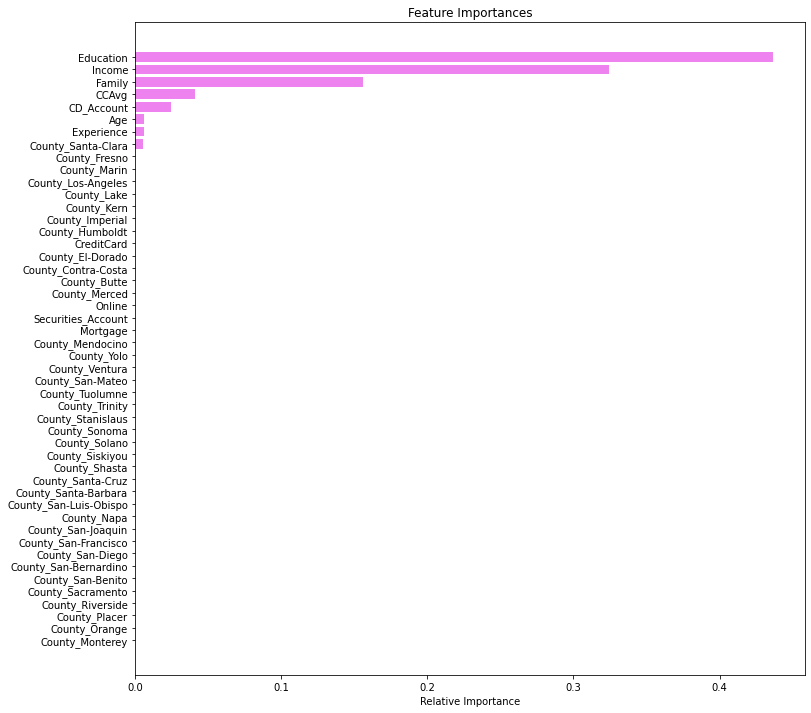

In [114]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all the decision tree models

In [116]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1.00,0.81,0.92,0.94], 'Test_Recall':[0.87,0.75,0.87,0.88]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.87
1,Decision tree with restricted maximum depth,0.81,0.75
2,Decision treee with hyperparameter tuning,0.92,0.87
3,Decision tree with post-pruning,0.94,0.88


## Summary

### We analyzed the data using different techniques and used Logisitic Regression & Decision Tree Classifier to build a predictive model for the same.
### Decision Tree with post pruning is giving highest recall on the test set.
### The most important variables are Education, Income, Family, CCAvg, Age & Experience in that order.

## Conclusion

### The more educated  the customer is  the more likely they are to take a loan 
### The more income the customer makes  the more likely they are to take a loan 
### The bigger the family size of the customer the more likely they are to take a loan 
